### Google Stock Price Prediction using RNN - LSTM

Recurrent Neural Networks are the first of its kind State of the Art algorithms that can Memorize/remember previous inputs in memory, When a huge set of Sequential data is given to it. Recurrent Neural Networks are the first of its kind State of the Art algorithms that can Memorize/remember previous inputs in memory, When a huge set of Sequential data is given to it.

#### Steps to build stock prediction model

- Data Preprocessing
- Building the RNN
- Making the prediction and visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/LP5/DL/4/GOOG.csv', date_parser = True)
data.tail()

<ipython-input-4-2dc0a52df2ec>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/LP5/DL/4/GOOG.csv', date_parser = True)


,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


In [5]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [6]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [8]:
# create RNN with 60 timesteps, i.e. look 60 previous time steps

In [9]:
data_training[0:10]

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98678849e-03,
        1.85522018e-01],
       [2.35285614e-03, 2.54928676e-03, 3.28434064e-03, 2.44873974e-03,
        1.11762967e-01],
       [2.34877785e-03, 2.52892558e-03, 3.60779701e-03, 3.22955376e-03,
        8.62763771e-02],
       [3.63326671e-03, 2.80177162e-03, 4.03492722e-03, 2.51005881e-03,
        7.55243925e-02],
       [2.48334262e-03, 1.52712947e-03, 2.50886935e-03, 8.17608079e-04,
        6.31682127e-02],
       [1.26817570e-03, 8.02253103e-04, 2.57107531e-03, 9.64778600e-04,
        5.97732318e-02],
       [1.43128522e-03, 5.00900100e-04, 1.53849690e-03, 9.81131336e-05,
        1.11151095e-01]])

In [10]:
X_train = []
y_train = []

In [11]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train.shape

(3557, 60, 5)

### Building LSTM

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [16]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [18]:
regressior.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
112/112 [==============================] - 26s 189ms/step - loss: 0.0114
Epoch 2/50
112/112 [==============================] - 20s 182ms/step - loss: 0.0024
Epoch 3/50
112/112 [==============================] - 21s 186ms/step - loss: 0.0019
Epoch 4/50
112/112 [==============================] - 21s 186ms/step - loss: 0.0016
Epoch 5/50
112/112 [==============================] - 20s 174ms/step - loss: 0.0017
Epoch 6/50
112/112 [==============================] - 21s 192ms/step - loss: 0.0015
Epoch 7/50
112/112 [==============================] - 20s 174ms/step - loss: 0.0015
Epoch 8/50
112/112 [==============================] - 21s 184ms/step - loss: 0.0014
Epoch 9/50
112/112 [==============================] - 20s 179ms/step - loss: 0.0013
Epoch 10/50
112/112 [==============================] - 19s 174ms/step - loss: 0.0012
Epoch 11/50
112/112 [==============================] - 21s 190ms/step - loss: 0.0014
Epoch 12/50
112/112 [==============================] - 19s 174ms/step - lo

### Prepare test dataset

In [19]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [22]:
data_test = data_test.drop(['Date', 'Adj Close'], axis = 1)
data_test

,Open,High,Low,Close,Volume
3617,1016.570007,1052.319946,1015.710022,1045.849976,1532600
3618,1041.000000,1056.979980,1014.070007,1016.059998,1841100
3619,1032.589966,1070.839966,1027.417969,1070.709961,2093900
3620,1071.500000,1074.000000,1054.760010,1068.390015,1981900
3621,1076.109985,1084.560059,1060.530029,1076.280029,1764900
...,...,...,...,...,...
3804,1220.969971,1226.000000,1212.300049,1219.000000,1404100
3805,1219.000000,1231.229980,1203.579956,1205.099976,1273500
3806,1196.979980,1196.979980,1171.290039,1176.630005,1615100
3807,1180.000000,1189.060059,1162.430054,1187.829956,1621200


In [23]:
inputs = scaler.transform(data_test)
inputs

array([[0.7917223 , 0.81886179, 0.80577234, 0.81741662, 0.01847369],
       [0.81172082, 0.82267146, 0.80440704, 0.79296878, 0.02221156],
       [0.80483632, 0.83400229, 0.81551906, 0.83781855, 0.02527455],
       [0.83668828, 0.83658569, 0.83828096, 0.83591463, 0.02391753],
       [0.84046203, 0.84521876, 0.84308443, 0.84238975, 0.0212883 ],
       [0.84499714, 0.8436409 , 0.84797113, 0.84106027, 0.01443533],
       [0.83354486, 0.83425577, 0.84073676, 0.83750669, 0.01755043],
       [0.82987753, 0.82822656, 0.83305292, 0.82672303, 0.01833072],
       [0.816567  , 0.81821601, 0.82703822, 0.81646461, 0.01376894],
       [0.81922747, 0.84153173, 0.83210387, 0.84310374, 0.01763767],
       [0.84364642, 0.85160764, 0.85874347, 0.84623866, 0.01604074],
       [0.84321254, 0.85113761, 0.85388177, 0.85356732, 0.01496118],
       [0.86001852, 0.86466922, 0.86836707, 0.86042814, 0.02359887],
       [0.85019526, 0.85090049, 0.8455319 , 0.83766267, 0.0194539 ],
       [0.8414771 , 0.84552124, 0.

In [24]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [25]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((132, 60, 5), (132,))

In [26]:
y_pred = regressior.predict(X_test)

5/5 [==============================] - 1s 42ms/step


In [27]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [28]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [32]:
y_pred = y_pred*scale
y_test = y_test*scale

print(y_pred[0])

print(y_test[0])

[1.5487297e+09]
1679549492.367961


### Visualization

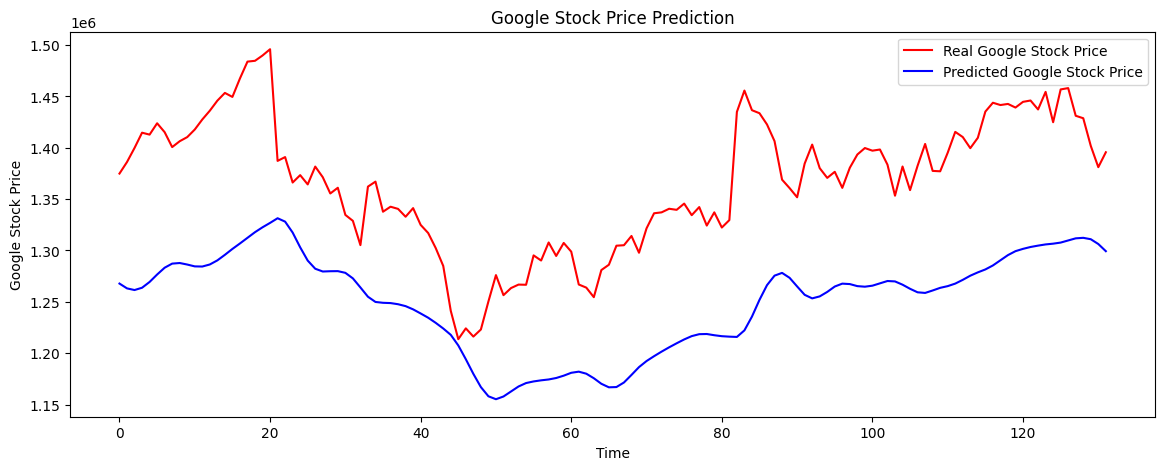

In [31]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()